### エッジ検出の自作
基本方針   
・微分フィルタを使って、画像の差分値をとる。   
・一定しきい値以上の画素差がある箇所のみを切り取る。   

In [5]:
from skimage import io
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

img_path = r"000.png"
img = io.imread(img_path)

In [71]:
# 差分のしきい値
threshold = -10

# グレースケール化
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_img = np.array(gray_img[400:800,:400],dtype=np.float32)
#gray_img = cv2.blur(gray_img, ksize=(3, 3))

# 縦方向と横方向で微分をとる。diffは(後の要素)-(前の要素)を計算する。
edge_h = np.diff(np.hstack((gray_img[:,0].reshape(gray_img.shape[0],1),gray_img)),axis=1)
edge_v = np.diff(np.vstack((gray_img[0,:].reshape(1,gray_img.shape[1]),gray_img)),axis=0)

# 一定しきい値以上の値になっている要素をTrue、それ以外はFalseにする。
edge_h_tf = np.where(edge_h < threshold,True,False)
edge_v_tf = np.where(edge_v < threshold,True,False)

# 論理演算
edge_img = np.logical_or(edge_h_tf,edge_v_tf)*255



In [48]:
arr = np.array([[0, 4, 3, 7],
                [1, 8, 2, 9]])

# 次元ごとに隣り合う要素同士の差分を計算
diff = np.diff(arr)

print(arr.shape)

(2, 4)


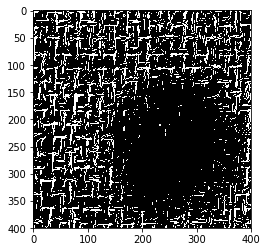

In [72]:
plt.imshow(edge_img,"gray")